Generate a population of 20 and use a fitness fuction that evaluates each plan based on its predicted improvement in VO2 max, aiming to maximize it.

Selection uses tournament selection, where the fittest individuals from small random subsets are chosen for reproduction.

Crossover is done through single-point crossover, where segments of two parents' plans are swapped to create new offspring.

Mutation introduces random changes to workout parameters, adding diversity to prevent premature convergence and improve the chances of finding an optimal solution

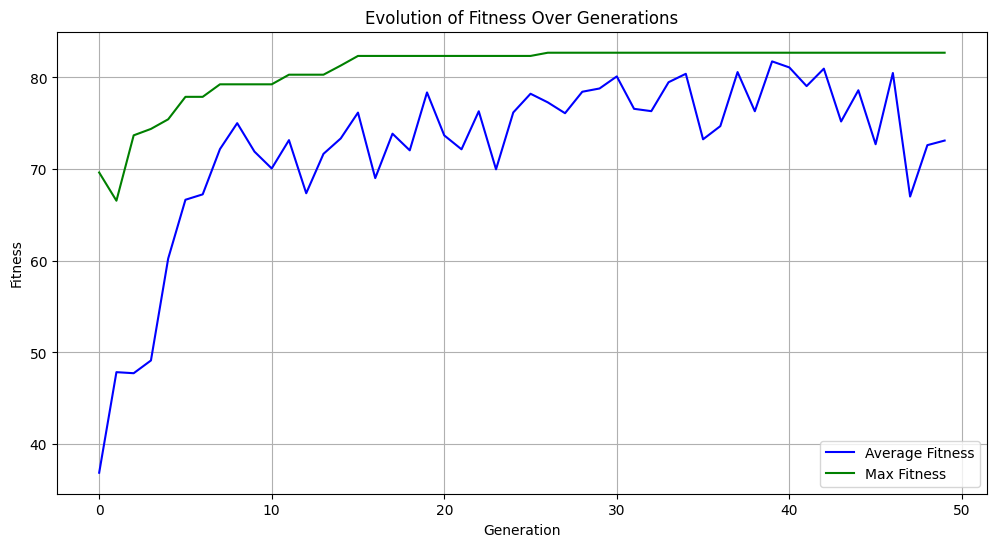

Optimized Workout Plan for VO₂ max improvement:
Duration (min): 60
Intensity (% max HR): 90
Frequency (times per week): 7


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

def fitness_function(workout_plan):
    duration, intensity, frequency = workout_plan
    vo2_max_improvement = (intensity * 0.1 + duration * 0.05) * frequency - (intensity * 0.01) ** 2 - (frequency * 0.1) ** 2
    return vo2_max_improvement

def generate_population(pop_size):
    population = []
    for _ in range(pop_size):
        duration = random.randint(20, 60)
        intensity = random.randint(60, 90)
        frequency = random.randint(1, 7)
        population.append([duration, intensity, frequency])
    return population

def selection(population, fitness_values):
    selected = random.sample(list(zip(population, fitness_values)), 2)
    selected = max(selected, key=lambda x: x[1])[0]
    return selected

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(child, mutation_rate=0.1):
    for i in range(len(child)):
        if random.random() < mutation_rate:
            if i == 0:
                child[i] = random.randint(20, 60)
            elif i == 1:
                child[i] = random.randint(60, 90)
            elif i == 2:
                child[i] = random.randint(1, 7)
    return child

def evolutionary_algorithm(pop_size=20, generations=50):
    population = generate_population(pop_size)
    avg_fitness_history = []
    max_fitness_history = []

    for generation in range(generations):
        fitness_values = [fitness_function(plan) for plan in population]

        avg_fitness = np.mean(fitness_values)
        max_fitness = np.max(fitness_values)
        avg_fitness_history.append(avg_fitness)
        max_fitness_history.append(max_fitness)

        next_generation = []
        for _ in range(pop_size // 2):
            parent1 = selection(population, fitness_values)
            parent2 = selection(population, fitness_values)
            child1, child2 = crossover(parent1, parent2)
            next_generation.extend([mutation(child1), mutation(child2)])

        population = next_generation

    final_fitness = [fitness_function(plan) for plan in population]
    best_plan = population[np.argmax(final_fitness)]

    plt.figure(figsize=(12, 6))
    plt.plot(avg_fitness_history, label='Average Fitness', color='blue')
    plt.plot(max_fitness_history, label='Max Fitness', color='green')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Evolution of Fitness Over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_plan

best_workout_plan = evolutionary_algorithm(pop_size=20, generations=50)
print("Optimized Workout Plan for VO₂ max improvement:")
print("Duration (min):", best_workout_plan[0])
print("Intensity (% max HR):", best_workout_plan[1])
print("Frequency (times per week):", best_workout_plan[2])
